In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle

In [2]:
df = pd.read_csv('data/data_with_prep.csv')
df

,PM25,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH
0,16.0,27.990519,22.596723,0.451799,5.466318,1.744248,0.5,308,30.7,69
1,14.0,27.990519,22.596723,0.451799,5.466318,1.744248,1.2,285,32.0,63
2,12.0,27.990519,22.596723,0.451799,5.466318,1.744248,0.3,329,33.7,57
3,14.0,27.990519,22.596723,0.451799,5.466318,1.744248,0.5,330,33.7,55
4,15.0,27.990519,22.596723,0.451799,5.466318,1.744248,0.4,324,33.5,55
...,...,...,...,...,...,...,...,...,...,...
36970,26.0,56.000000,20.000000,0.760000,20.000000,1.000000,2.3,83,30.4,60
36971,14.0,32.000000,26.000000,0.610000,18.000000,1.000000,2.4,88,31.5,58
36972,16.0,32.000000,22.596723,0.451799,14.000000,1.744248,2.9,71,32.7,53
36973,13.0,25.000000,28.000000,0.520000,18.000000,1.000000,2.7,69,33.4,49


In [3]:
X = df.drop(columns='PM25')
X

,PM10,O3,CO,NO2,SO2,WS,WD,TEMP,RH
0,27.990519,22.596723,0.451799,5.466318,1.744248,0.5,308,30.7,69
1,27.990519,22.596723,0.451799,5.466318,1.744248,1.2,285,32.0,63
2,27.990519,22.596723,0.451799,5.466318,1.744248,0.3,329,33.7,57
3,27.990519,22.596723,0.451799,5.466318,1.744248,0.5,330,33.7,55
4,27.990519,22.596723,0.451799,5.466318,1.744248,0.4,324,33.5,55
...,...,...,...,...,...,...,...,...,...
36970,56.000000,20.000000,0.760000,20.000000,1.000000,2.3,83,30.4,60
36971,32.000000,26.000000,0.610000,18.000000,1.000000,2.4,88,31.5,58
36972,32.000000,22.596723,0.451799,14.000000,1.744248,2.9,71,32.7,53
36973,25.000000,28.000000,0.520000,18.000000,1.000000,2.7,69,33.4,49


In [4]:
y = df['PM25']
y

0        16.0
1        14.0
2        12.0
3        14.0
4        15.0
         ... 
36970    26.0
36971    14.0
36972    16.0
36973    13.0
36974    11.0
Name: PM25, Length: 36975, dtype: float64

In [5]:
scaler = MinMaxScaler()

In [6]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.15783236, 0.0938988 , 0.04083169, ..., 0.85555556, 0.29519231,
        0.68316832],
       [0.15783236, 0.0938988 , 0.04083169, ..., 0.79166667, 0.30769231,
        0.62376238],
       [0.15783236, 0.0938988 , 0.04083169, ..., 0.91388889, 0.32403846,
        0.56435644],
       ...,
       [0.18421053, 0.0938988 , 0.04083169, ..., 0.19722222, 0.31442308,
        0.52475248],
       [0.13815789, 0.1173913 , 0.04713494, ..., 0.19166667, 0.32115385,
        0.48514851],
       [0.125     , 0.11304348, 0.05083179, ..., 0.15277778, 0.32596154,
        0.47524752]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=42) 

In [8]:
print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (29580, 9)
Test shape:  (7395, 9)


In [9]:
lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
mlp = MLPRegressor() 
mlp.fit(X_train, y_train)

MLPRegressor()

In [11]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

## Evaluate Model

In [47]:
def calculate_metrics(X, Y, model):
    pred = model.predict(X)
    mse = mean_squared_error(Y, pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(Y, pred)
    r2 = r2_score(Y, pred)
    
    return rmse, mae, r2

In [53]:
lr_rmse, lr_mae, lr_r2 = calculate_metrics(X_test, y_test, lr)
print(f"RMSE: {lr_rmse}")
print(f"MAE: {lr_mae}")
print(f"R^2: {lr_r2}")

RMSE: 5.369104452628258
MAE: 3.751704286816952
R^2: 0.40896484039145753


In [54]:
mlp_rmse, mlp_mae, mlp_r2 = calculate_metrics(X_test, y_test, mlp)
print(f"RMSE: {mlp_rmse}")
print(f"MAE: {mlp_mae}")
print(f"R^2: {mlp_r2}")

RMSE: 5.229643304084833
MAE: 3.6759300081001296
R^2: 0.4392700578709471


In [55]:
svr_rmse, svr_mae, svr_r2 = calculate_metrics(X_test, y_test, svr)
print(f"RMSE: {svr_rmse}")
print(f"MAE: {svr_mae}")
print(f"R^2: {svr_r2}")

RMSE: 5.311992090955695
MAE: 3.6502720146633023
R^2: 0.4214719101123231


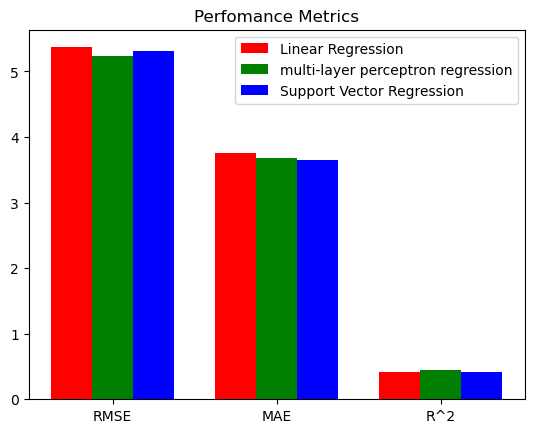

In [113]:
N = 3
ind = np.arange(N)  
width = 0.25
  
xvals = [lr_rmse[0], lr_mae[0], lr_r2[0]] 
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = [mlp_rmse[0], mlp_mae[0], mlp_r2[0]] 
bar2 = plt.bar(ind+width, yvals, width, color='g') 
  
zvals = [svr_rmse[0], svr_mae[0], svr_r2[0]] 
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b') 
  
plt.title("Perfomance Metrics") 
  
plt.xticks(ind+width,['RMSE', 'MAE', 'R^2']) 
plt.legend( (bar1, bar2, bar3), ('Linear Regression', 'multi-layer perceptron regression', 'Support Vector Regression') ) 
plt.show() 

In [115]:
data = {'model': ['LR', 'MLP', 'SVR'],
        'MAE': [lr_mae[0], mlp_mae[0], svr_mae[0]],
        'RMSE': [lr_rmse[0], mlp_rmse[0], svr_rmse[0]],
        'R^2': [lr_r2[0], mlp_r2[0], svr_r2[0]]}

perfomance = pd.DataFrame(data)
perfomance

,model,MAE,RMSE,R^2
0,LR,3.751704,5.369104,0.408965
1,MLP,3.675930,5.229643,0.439270
2,SVR,3.650272,5.311992,0.421472


ความสามารถในการเลือกโมเดลที่เหมาะสมขึ้นอยู่กับวัตถุประสงค์และเนื้อหาของงาน อย่างไรก็ตาม, จากกราฟเปรียบเทียบ, Multi-layer Perceptron Regression มีค่า RMSE และ MAE ที่ต่ำกว่าและค่า R^2 ที่สูงกว่าที่สุด ซึ่งหมายความว่า Multi-layer Perceptron Regression มีประสิทธิภาพที่ดีที่สุดในการทำนายข้อมูล pm2.5 โดยเฉพาะต้องการค่าที่ต่ำที่สุดของ RMSE และ MAE และค่าที่สูงที่สุดของ R^2 ควรเลือก Multi-layer Perceptron Regression เป็นโมเดลที่เหมาะสมสำหรับงานในรายการนี้.

In [16]:
# save model
pickle.dump(lr, open("model/lr_model.pickle", 'wb'))
pickle.dump(mlp, open("model/mlp_model.pickle", 'wb'))
pickle.dump(svr, open("model/svr_model.pickle", 'wb'))

## Model test

In [23]:
lr_model = pickle.load(open("model/lr_model.pickle", 'rb'))
lr_model

LinearRegression()

In [28]:
mlp_model = pickle.load(open("model/mlp_model.pickle", 'rb'))
mlp_model

MLPRegressor()

In [17]:
svr_model = pickle.load(open("model/svr_model.pickle", 'rb'))
svr_model

SVR()

In [18]:
X_test[:20]

array([[1.90789474e-01, 2.26086957e-01, 1.94085028e-02, 0.00000000e+00,
        3.93781898e-03, 4.17287630e-03, 6.77777778e-01, 3.20192308e-01,
        6.33663366e-01],
       [1.57832363e-01, 9.38987957e-02, 4.08316925e-02, 2.50916757e-02,
        3.93781898e-03, 0.00000000e+00, 0.00000000e+00, 3.00000000e-01,
        0.00000000e+00],
       [1.77631579e-01, 7.39130435e-02, 3.60443623e-02, 1.12359551e-02,
        0.00000000e+00, 2.98062593e-04, 7.86111111e-01, 2.87500000e-01,
        6.83168317e-01],
       [1.57832363e-01, 9.38987957e-02, 4.08316925e-02, 2.50916757e-02,
        3.93781898e-03, 0.00000000e+00, 0.00000000e+00, 2.78846154e-01,
        6.83168317e-01],
       [3.55263158e-01, 9.38987957e-02, 1.21072089e-01, 8.98876404e-02,
        0.00000000e+00, 3.36810730e-02, 3.27777778e-01, 3.00000000e-01,
        6.03960396e-01],
       [1.57832363e-01, 6.52173913e-02, 4.08316925e-02, 5.61797753e-03,
        3.93781898e-03, 5.66318927e-03, 5.16666667e-01, 2.50961538e-01,
        8.7

### ทำนายด้วย 3 Model

In [116]:
y_lr_pred = lr_model.predict(X_test[:30])
y_lr_pred

array([17.84103589, 15.45189386, 14.47242314, 14.66998053, 29.27325697,
       13.05474191, 14.76773051, 14.91985113,  8.52495192, 23.09273815,
       14.93063556, 24.27360819, 12.51071521, 26.28839046, 10.97352762,
        6.18381356, 14.59515999, 13.87473781, 14.26632791, 26.24658425,
       14.93063556, 14.79080547,  9.7076809 ,  9.9838136 , 12.98715569,
       14.93063556, 20.48710374, 13.59004608, 13.94854468, 22.55740299])

In [117]:
y_mlp_pred = mlp_model.predict(X_test[:30])
y_mlp_pred

array([16.74605048, 18.58818098, 15.36710737, 15.15840512, 28.71085212,
       12.6725442 , 13.72716837, 15.17055964,  7.61784493, 21.78623935,
       15.19769892, 24.70837696, 12.37070996, 25.68540262, 11.15800235,
        5.13528639, 14.61701515, 14.22030499, 13.69681896, 26.20922733,
       15.19769892, 15.74158414,  9.88988717,  9.05564823, 13.44962048,
       15.19769892, 19.97844042, 14.82213771, 14.42242776, 22.70547032])

In [118]:
y_svr_pred = svr_model.predict(X_test[:30])
y_svr_pred

array([17.2632512 , 17.82744387, 15.09548454, 14.08753001, 29.17915993,
       12.66891468, 12.88104118, 13.99090335,  8.05110384, 22.13661299,
       14.04325066, 24.19676681, 12.63310328, 24.18647363, 11.59181616,
        5.47929973, 13.60604344, 13.62362271, 14.0642491 , 26.59977914,
       14.04325066, 14.60861003,  9.46726733,  8.90625537, 11.39674822,
       14.04325066, 20.92119663, 13.98003315, 13.43442827, 23.17652738])

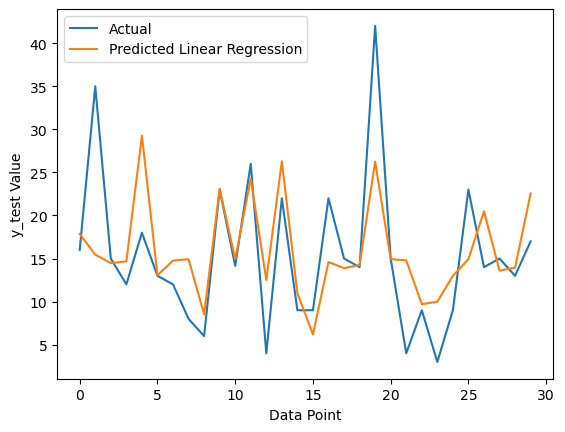

<Figure size 1200x400 with 0 Axes>

In [119]:
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')
sns.lineplot(x=range(len(y_lr_pred[:30])), y=y_lr_pred[:30], label='Predicted Linear Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

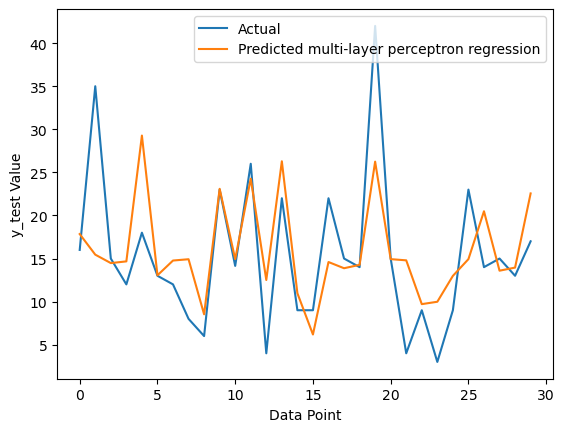

<Figure size 1200x400 with 0 Axes>

In [120]:
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')
sns.lineplot(x=range(len(y_lr_pred[:30])), y=y_lr_pred[:30], label='Predicted multi-layer perceptron regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

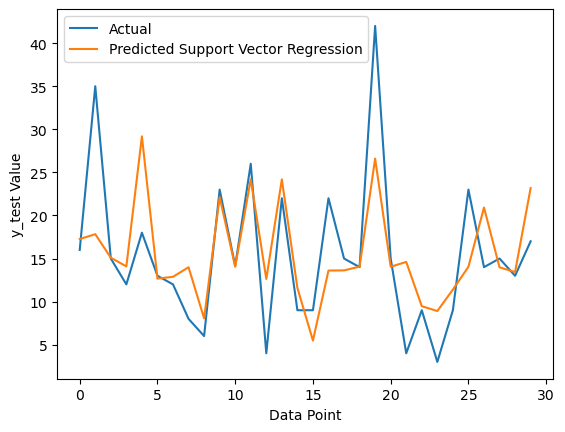

<Figure size 1200x400 with 0 Axes>

In [121]:
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')
sns.lineplot(x=range(len(y_svr_pred[:30])), y=y_svr_pred[:30], label='Predicted Support Vector Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

In [137]:
### เปรียบเทียบค่าที่ทำนายทั้ง 3 model กับค่าจริง

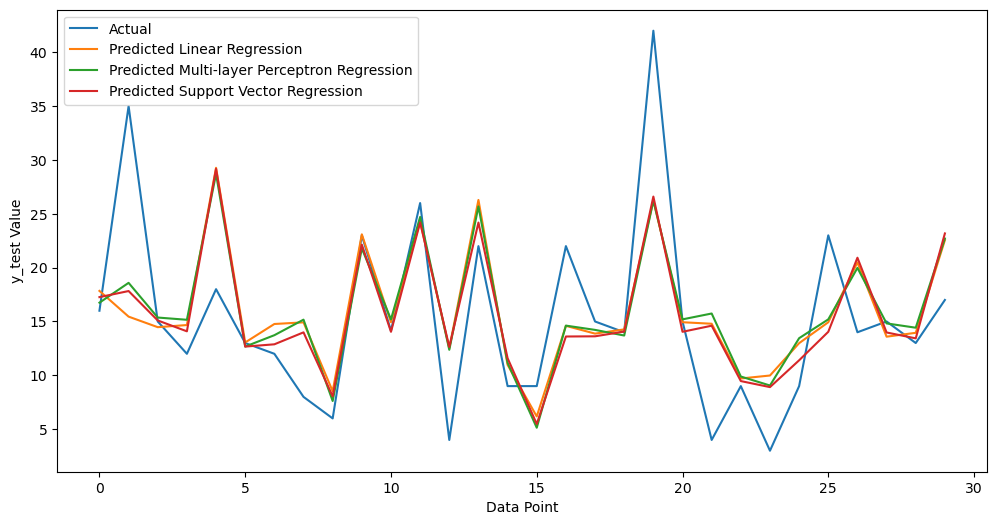

In [135]:
plt.figure(figsize=(12, 6))

# Plot actual data
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')

# Plot predicted data for Linear Regression
sns.lineplot(x=range(len(y_lr_pred[:30])), y=y_lr_pred[:30], label='Predicted Linear Regression')

# Plot predicted data for Multi-layer Perceptron Regression
sns.lineplot(x=range(len(y_mlp_pred[:30])), y=y_mlp_pred[:30], label='Predicted Multi-layer Perceptron Regression')

# Plot predicted data for Support Vector Regression
sns.lineplot(x=range(len(y_svr_pred[:30])), y=y_svr_pred[:30], label='Predicted Support Vector Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.legend()
plt.show()